In [1]:
import numpy as np
import scipy as sp
import torch as th
import torchvision as thv, torchtext as tht

import os, pdb, sys, json, glob, tqdm
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

sns.set_context('notebook')

%matplotlib notebook
plt.rcParams['figure.figsize'] = [4,4]
plt.rcParams['figure.dpi'] = 200
# %config InlineBackend.figure_format ='retina'

dev = 'cpu'

In [2]:
k = ['MNIST', 'CIFAR10', 'CIFAR100', 'STL10']

In [3]:
ds = [getattr(thv.datasets, kk)(root='~/data', download=True) for kk in k]
xs = [d.data for d in ds]

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
x = [t.reshape(t.shape[0],-1).astype(np.float16)
     if (not 'torch' in str(type(t))) else t.numpy().reshape(t.shape[0],-1).astype(np.float16)
     for t in xs]

In [5]:
e = [sp.linalg.svd(a/a.shape[0], compute_uv=False) for a in x]

<IPython.core.display.Javascript object>


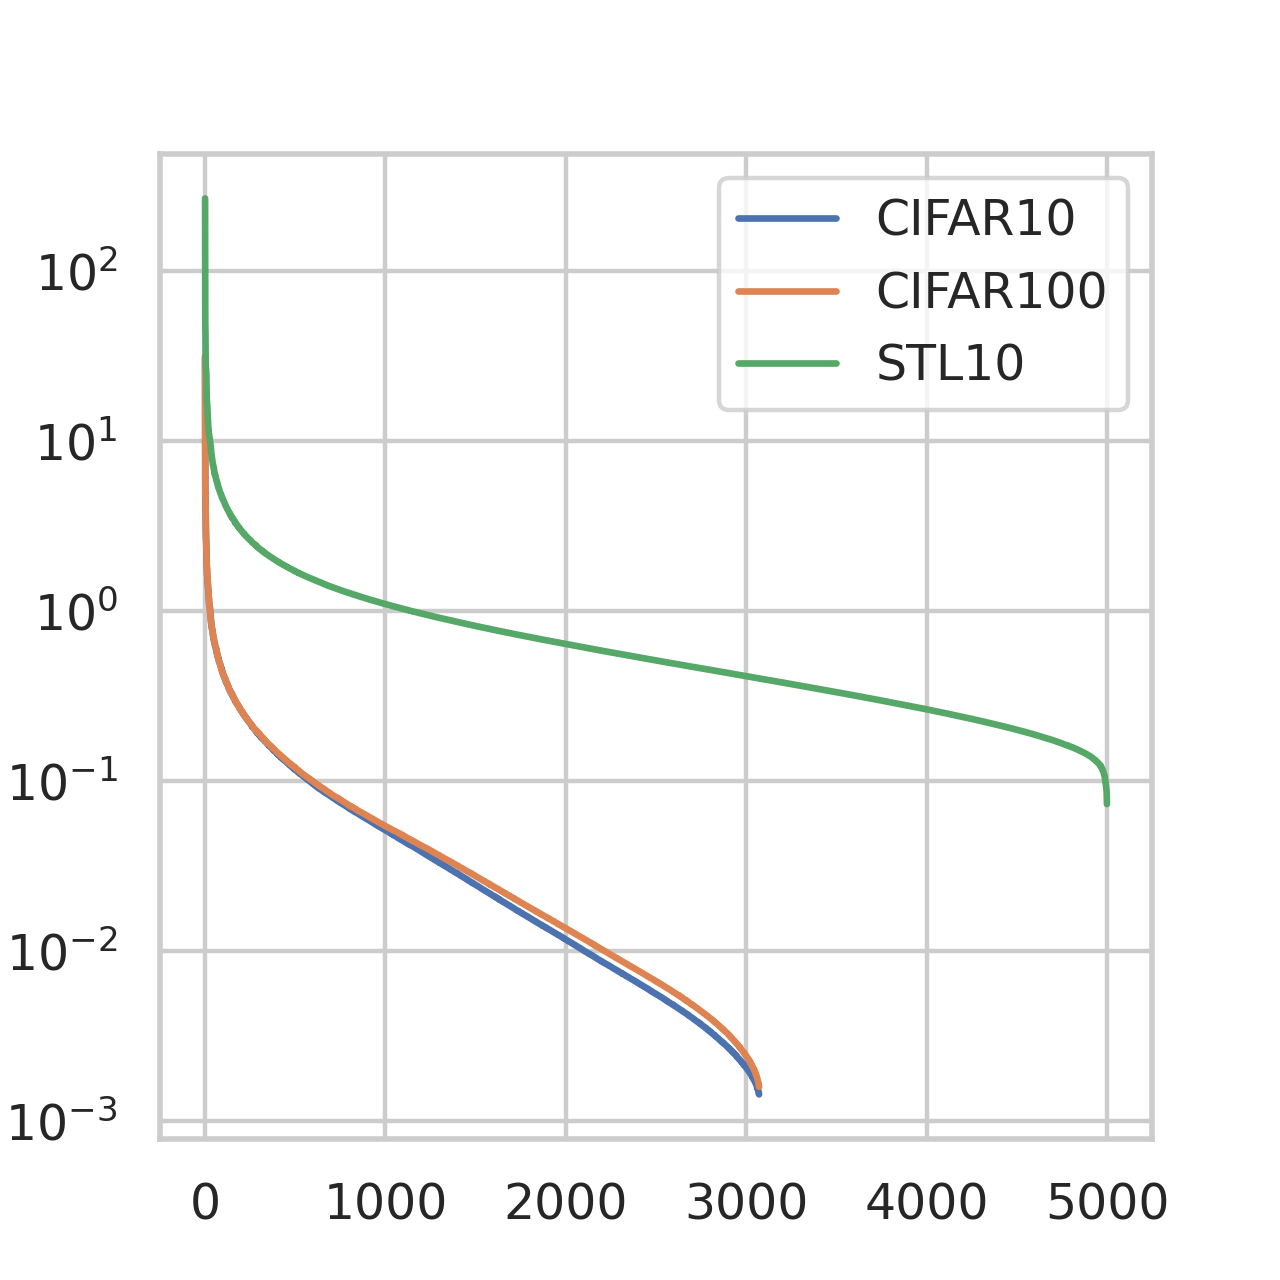

In [7]:
plt.figure(1); plt.clf();
for i in range(1,len(k)):
    plt.semilogy(e[i], label=k[i])
plt.legend()